<a href="https://colab.research.google.com/github/guteng083/Haepe-Recommendation-System/blob/main/Haepe.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [93]:
import tensorflow as tf

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

data = pd.read_csv('cemara_dataset.csv')
data = data.drop(['Timestamp'], axis=1)
data = data.dropna(axis=0)
x = data.drop(['Aktivitas'], axis=1)
y = data['Aktivitas']

le = LabelEncoder()
x = pd.get_dummies(x)
y = le.fit_transform(y)
x.shape, y.shape

((222, 45), (222,))

### Mendefenisikan arsitektur fully connected layer
pendefenisian arsitektur fully connected neural network menggunakan API fungsi sequential() 

In [94]:
def build_fc_model():
  fc_model = tf.keras.Sequential([

      tf.keras.layers.Flatten(),
      tf.keras.layers.Dense(46, activation=tf.nn.relu, input_shape=(46,)),
      tf.keras.layers.Dense(64, activation=tf.nn.relu),
      tf.keras.layers.Dense(128, activation=tf.nn.relu),
      tf.keras.layers.Dense(1, activation=tf.nn.sigmoid) 
      
  ])
  return fc_model

model = build_fc_model()

###Melakukan compile dengan menggunakan Optimizer Adam dan learning rate=0.001, loss"MSE" dan metrics "MAE"

In [95]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), 
              loss=tf.keras.losses.MeanAbsoluteError(),
              metrics=[tf.keras.metrics.RootMeanSquaredError(name='RMSE')])


###Training Data

In [96]:
BATCH_SIZE = 50
EPOCHS = 20
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)
history = model.fit(X_train, y_train,
                    validation_data=(X_test, y_test),
                    epochs=EPOCHS,
                    batch_size=BATCH_SIZE)

Epoch 1/20
4/4 [==============================] - 1s 49ms/step - loss: 2.5942 - RMSE: 3.2618 - val_loss: 2.5204 - val_RMSE: 2.9827
Epoch 2/20
4/4 [==============================] - 0s 10ms/step - loss: 2.5199 - RMSE: 3.1939 - val_loss: 2.4452 - val_RMSE: 2.9105
Epoch 3/20
4/4 [==============================] - 0s 9ms/step - loss: 2.4445 - RMSE: 3.1224 - val_loss: 2.3696 - val_RMSE: 2.8384
Epoch 4/20
4/4 [==============================] - 0s 15ms/step - loss: 2.3684 - RMSE: 3.0569 - val_loss: 2.2980 - val_RMSE: 2.7702
Epoch 5/20
4/4 [==============================] - 0s 17ms/step - loss: 2.2988 - RMSE: 2.9948 - val_loss: 2.2395 - val_RMSE: 2.7142
Epoch 6/20
4/4 [==============================] - 0s 10ms/step - loss: 2.2428 - RMSE: 2.9456 - val_loss: 2.2003 - val_RMSE: 2.6762
Epoch 7/20
4/4 [==============================] - 0s 10ms/step - loss: 2.2072 - RMSE: 2.9145 - val_loss: 2.1800 - val_RMSE: 2.6562
Epoch 8/20
4/4 [==============================] - 0s 15ms/step - loss: 2.1886 - RMSE

##Menampilkan hasil

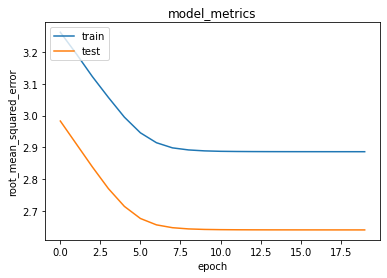

In [98]:
plt.plot(history.history['RMSE'])
plt.plot(history.history['val_RMSE'])
plt.title('model_metrics')
plt.ylabel('root_mean_squared_error')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
model.save('haepe.h5')

In [ ]:
import pathlib
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

tflite_file = pathlib.Path('haepe.tflite')
tflite_file.write_bytes(tflite_model)

INFO:tensorflow:Assets written to: C:\Users\RIZKIP~1\AppData\Local\Temp\tmpu0x31rhd\assets


51480